In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)

x_train,x_valid,y_train,y_vaild=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_vaild.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 数据标准化

from sklearn.preprocessing import StandardScaler

saclar = StandardScaler()
x_train_sacled = saclar.fit_transform(x_train)
x_valid_sacled = saclar.transform(x_valid)
x_test_sacled=saclar.transform(x_test)

In [6]:
"""
在keras中，数据是以张量的形式表示的，张量的形状称之为shape，表示从最外层向量逐步到达最底层向量的降维解包过程。比如，一个一阶的张量[1,2,3]的shape是(3,);
一个二阶的张量[[1,2,3],[4,5,6]]的shape是(2,3);一个三阶的张量[[[1],[2],[3]],[[4],[5],[6]]]的shape是(2,3,1)。

input_shape就是指输入张量的shape。例如，input_dim=784，说明输入是一个784维的向量，这相当于一个一阶的张量，它的shape就是(784,)。因此，input_shape=(784,)。
————————————————
版权声明：本文为CSDN博主「Flyver」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/x_ym/article/details/77728732
"""
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
# learning_rate:[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
# 学习用于参数W值的更新上
# W = W + grad * learning_rate
learning_rate=[1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]
histories = []
for lr in learning_rate:
    model = keras.models.Sequential([

        keras.layers.Dense(30,activation="relu",input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    
    # 目标函数：均方差，optimizer：不用随机梯度下降了，用指定的学习率
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
    history = model.fit(x_train_sacled,y_train,validation_data=(x_valid_sacled,y_vaild),epochs=100,callbacks=callbacks)
    histories.append(history)
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 133us/sample - loss: 5.0553 - val_loss: 4.5355
Epoch 2/100
11610/11610 [==============================] - 1s 76us/sample - loss: 3.5502 - val_loss: 3.2912
Epoch 3/100
11610/11610 [==============================] - 1s 74us/sample - loss: 2.6788 - val_loss: 2.5470
Epoch 4/100
11610/11610 [==============================] - 1s 74us/sample - loss: 2.1471 - val_loss: 2.0828
Epoch 5/100
11610/11610 [==============================] - 1s 74us/sample - loss: 1.8086 - val_loss: 1.7829
Epoch 6/100
11610/11610 [==============================] - 1s 74us/sample - loss: 1.5802 - val_loss: 1.5771
Epoch 7/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.4194 - val_loss: 1.4318
Epoch 8/100
11610/11610 [==============================] - 1s 77us/sample - loss: 1.3018 - val_loss: 1.3250
Epoch 9/100
11610/11610 [==============================] - 1s 78us/sample - loss: 1.21

11610/11610 [==============================] - 1s 116us/sample - loss: 0.5831 - val_loss: 0.6366
Epoch 76/100
11610/11610 [==============================] - 1s 101us/sample - loss: 0.5813 - val_loss: 0.6345
Epoch 77/100
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5794 - val_loss: 0.6323
Epoch 78/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.5776 - val_loss: 0.6302
Epoch 79/100
11610/11610 [==============================] - 1s 99us/sample - loss: 0.5758 - val_loss: 0.6281
Epoch 80/100
11610/11610 [==============================] - 1s 103us/sample - loss: 0.5740 - val_loss: 0.6260
Epoch 81/100
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5723 - val_loss: 0.6240
Epoch 82/100
11610/11610 [==============================] - 1s 95us/sample - loss: 0.5706 - val_loss: 0.6221
Epoch 83/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5690 - val_loss: 0.6201
Epoch 84/100
11610/11610 [==

11610/11610 [==============================] - 1s 97us/sample - loss: 0.5736 - val_loss: 0.6080
Epoch 5/100
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5512 - val_loss: 0.5864
Epoch 6/100
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5346 - val_loss: 0.5699
Epoch 7/100
11610/11610 [==============================] - 1s 97us/sample - loss: 0.5210 - val_loss: 0.5544
Epoch 8/100
11610/11610 [==============================] - 1s 98us/sample - loss: 0.5111 - val_loss: 0.5446
Epoch 9/100
11610/11610 [==============================] - 1s 96us/sample - loss: 0.5027 - val_loss: 0.5346
Epoch 10/100
11610/11610 [==============================] - 1s 107us/sample - loss: 0.4958 - val_loss: 0.5277
Epoch 11/100
11610/11610 [==============================] - 1s 103us/sample - loss: 0.4907 - val_loss: 0.5210
Epoch 12/100
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4863 - val_loss: 0.5162
Epoch 13/100
11610/11610 [========

d:\anaconda3\envs\tf2\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


11610/11610 [==============================] - 1s 95us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 1s 94us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 1s 94us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 1s 95us/sample - loss: nan - val_loss: nan


learing_rate: 0.0001


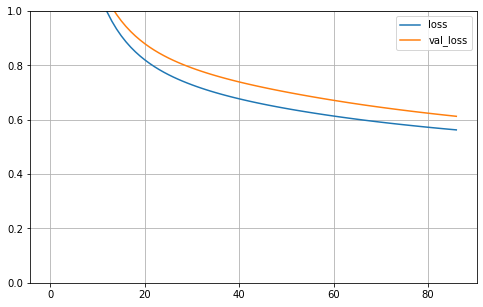

learing_rate: 0.0003


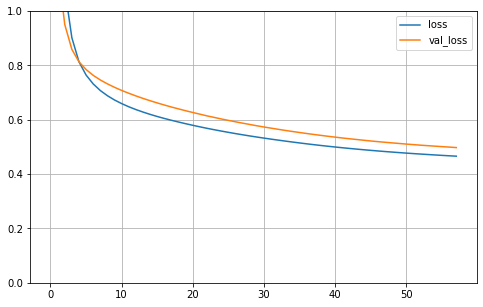

learing_rate: 0.001


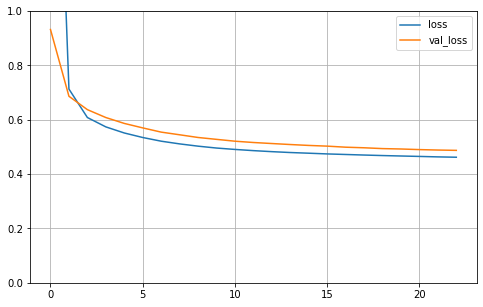

learing_rate: 0.003


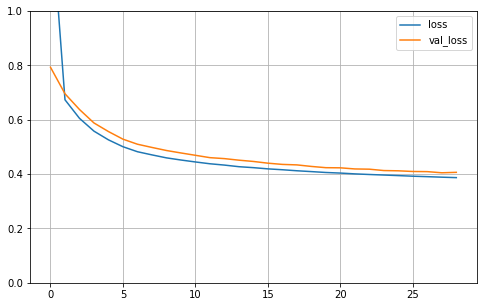

learing_rate: 0.01


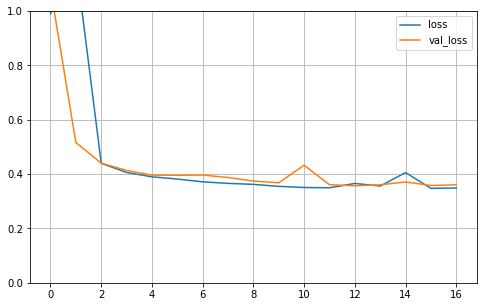

learing_rate: 0.03


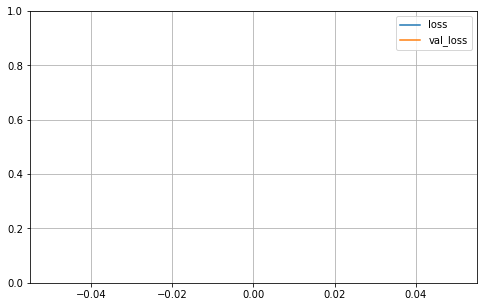

In [8]:
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

for lr,history in zip(learning_rate,histories):
    print("learing_rate:",lr)
    plot_learning_curves(history)
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※

In [ ]:
model.evaluate(x_test_sacled,y_test)